# Absenteeism Dataset

In [129]:
# Let's load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [130]:
# Let's load given data
data = pd.read_excel('Absenteeism_at_work.xlsx')

In [131]:
# Let's observe initial 5 rows
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [132]:
# Let's take information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [133]:
# Let's describe data
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,...,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00
mean,18.02,19.22,6.32,3.91,2.54,221.33,29.63,12.55,36.45,271490.24,...,0.05,1.29,1.02,0.57,0.07,0.75,79.04,172.11,26.68,6.92
std,11.02,8.43,3.44,1.42,1.11,66.95,14.84,4.38,6.48,39058.12,...,0.23,0.67,1.10,0.50,0.26,1.32,12.88,6.03,4.29,13.33
min,1.00,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,205917.00,...,0.00,1.00,0.00,0.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,9.00,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,244387.00,...,0.00,1.00,0.00,0.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,18.00,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,264249.00,...,0.00,1.00,1.00,1.00,0.00,0.00,83.00,170.00,25.00,3.00
75%,28.00,26.00,9.00,5.00,4.00,260.00,50.00,16.00,40.00,294217.00,...,0.00,1.00,2.00,1.00,0.00,1.00,89.00,172.00,31.00,8.00
max,36.00,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,378884.00,...,1.00,4.00,4.00,1.00,1.00,8.00,108.00,196.00,38.00,120.00


In [134]:
# Let's observe columns having unique values with maximum and minimum
for column in data.columns:
    print(f"Column: {column}")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Max: {data[column].max()}")
    print(f"Min: {data[column].min()}")

Column: ID
Number of unique values: 36
Max: 36
Min: 1
Column: Reason for absence
Number of unique values: 28
Max: 28
Min: 0
Column: Month of absence
Number of unique values: 13
Max: 12
Min: 0
Column: Day of the week
Number of unique values: 5
Max: 6
Min: 2
Column: Seasons
Number of unique values: 4
Max: 4
Min: 1
Column: Transportation expense
Number of unique values: 24
Max: 388
Min: 118
Column: Distance from Residence to Work
Number of unique values: 25
Max: 52
Min: 5
Column: Service time
Number of unique values: 18
Max: 29
Min: 1
Column: Age
Number of unique values: 22
Max: 58
Min: 27
Column: Work load Average/day 
Number of unique values: 38
Max: 378884
Min: 205917
Column: Hit target
Number of unique values: 13
Max: 100
Min: 81
Column: Disciplinary failure
Number of unique values: 2
Max: 1
Min: 0
Column: Education
Number of unique values: 4
Max: 4
Min: 1
Column: Son
Number of unique values: 5
Max: 4
Min: 0
Column: Social drinker
Number of unique values: 2
Max: 1
Min: 0
Column: Socia

In [135]:
# Let's check columns
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

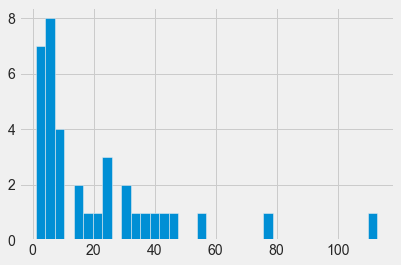

In [136]:
data.ID.value_counts().hist(bins=data.ID.nunique())

In [137]:
data.drop('ID', axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C516327B48>,
      dtype=object)

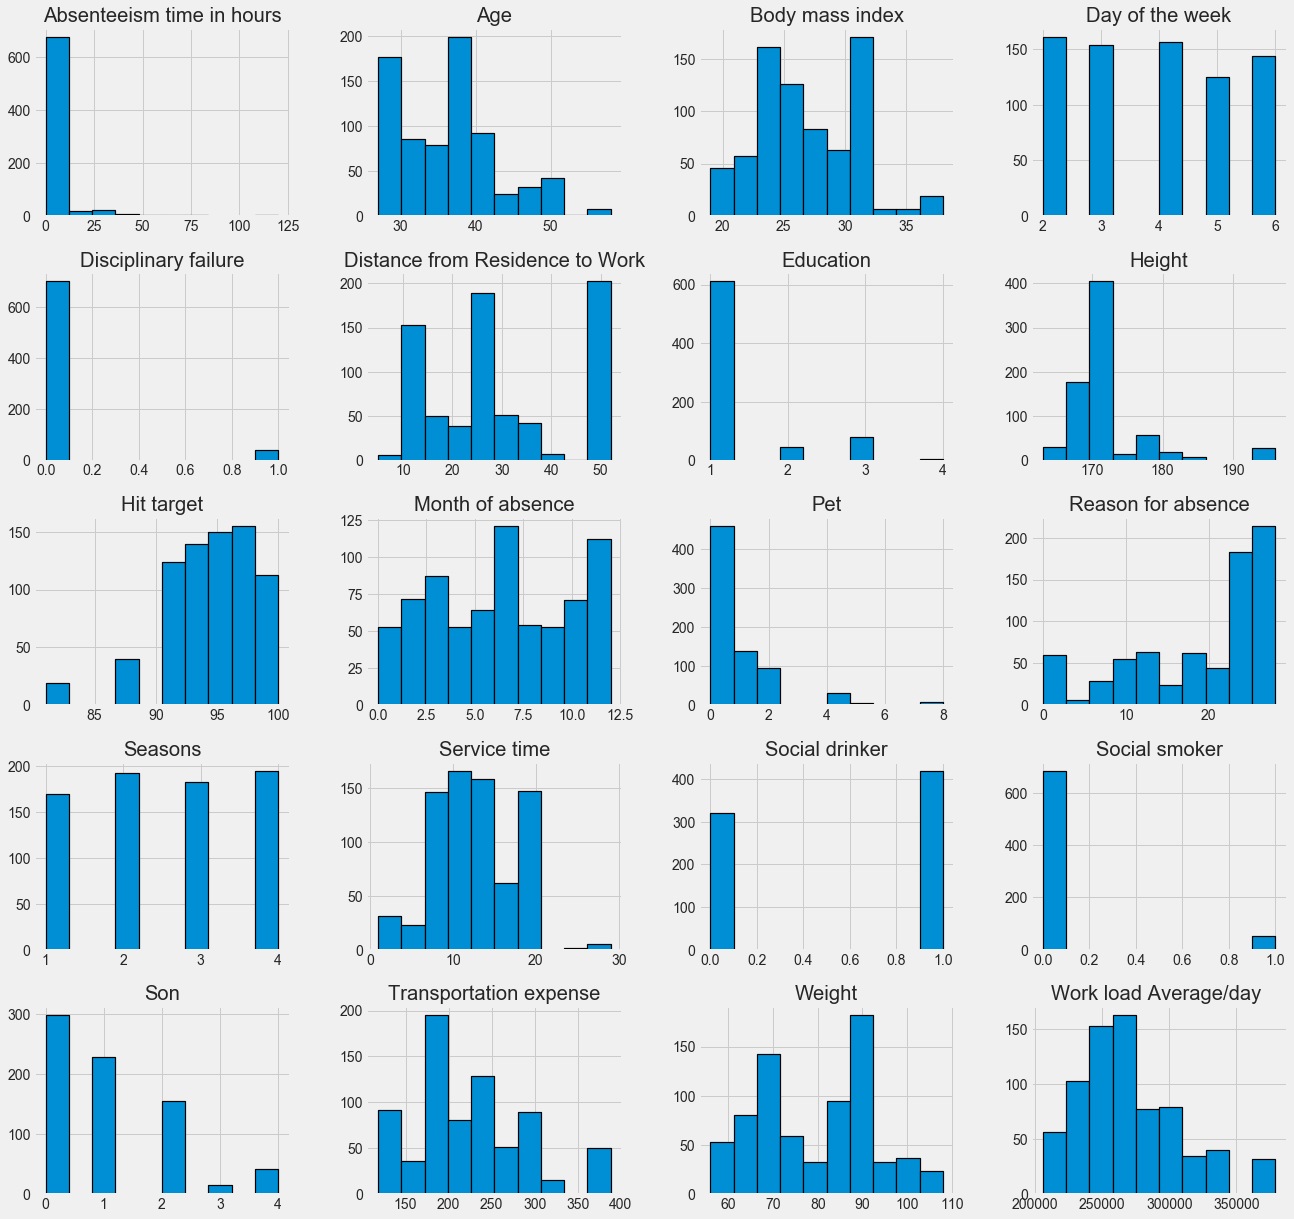

In [138]:
# Let's Visulaze the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [139]:
print(f"{data['Absenteeism time in hours'].value_counts()}")
print(f"{data['Absenteeism time in hours'].value_counts()[0] / data['Absenteeism time in hours'].value_counts()[1]}")

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64
0.5


In [140]:
data["Reason for absence"].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

In [141]:
data["Reason for absence"] = data["Reason for absence"].map({0: "Group_1", 1: "Group_1", 2: "Group_1", 3: "Group_1", 
                                                             4: "Group_1", 5: "Group_1", 6: "Group_1", 7: "Group_1", 
                                                             8: "Group_1", 9: "Group_1", 10: "Group_1", 11: "Group_1", 
                                                             12: "Group_1", 13: "Group_1", 14: "Group_1", 15: "Group_2", 
                                                             16: "Group_2", 17: "Group_2", 17: "Group_2", 18: "Group_3", 
                                                             19: "Group_3", 20: "Group_3", 21: "Group_3", 22: "Group_4", 
                                                             23: "Group_4", 24: "Group_4", 25: "Group_4", 26: "Group_4", 
                                                             27: "Group_4", 28: "Group_4"})
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["Reason for absence"].value_counts()

Group_4    435
Group_1    232
Group_3     67
Group_2      6
Name: Reason for absence, dtype: int64

In [142]:
# Let's create dummy data
data_1 = pd.get_dummies(data, columns=['Reason for absence'])

In [143]:
data_1.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason for absence_Group_1,Reason for absence_Group_2,Reason for absence_Group_3,Reason for absence_Group_4
0,7,3,1,289,36,13,33,239554,97,0,...,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,...,0,0,98,178,31,0,1,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,...,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,...,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,...,0,1,90,172,30,2,0,0,0,1


In [144]:
# Let's check data types
data_1.dtypes

Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
Reason for absence_Group_1         uint8
Reason for absence_Group_2         uint8
Reason for absence_Group_3         uint8
Reason for absence_Group_4         uint8
dtype: object

In [145]:
data_1.dropna(inplace=True)
data_1.isna().sum()

Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
Reason for absence_Group_1         0
Reason for absence_Group_2         0
Reason for absence_Group_3         0
Reason for absence_Group_4         0
dtype: int64

In [146]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})

In [147]:
data_1.Education.value_counts()

0    611
1    129
Name: Education, dtype: int64

In [148]:
data_1.Education.isna().sum()

0

In [149]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)
data_2.columns

Index(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours',
       'Reason for absence_Group_1', 'Reason for absence_Group_2',
       'Reason for absence_Group_3', 'Reason for absence_Group_4',
       'Education_1'],
      dtype='object')

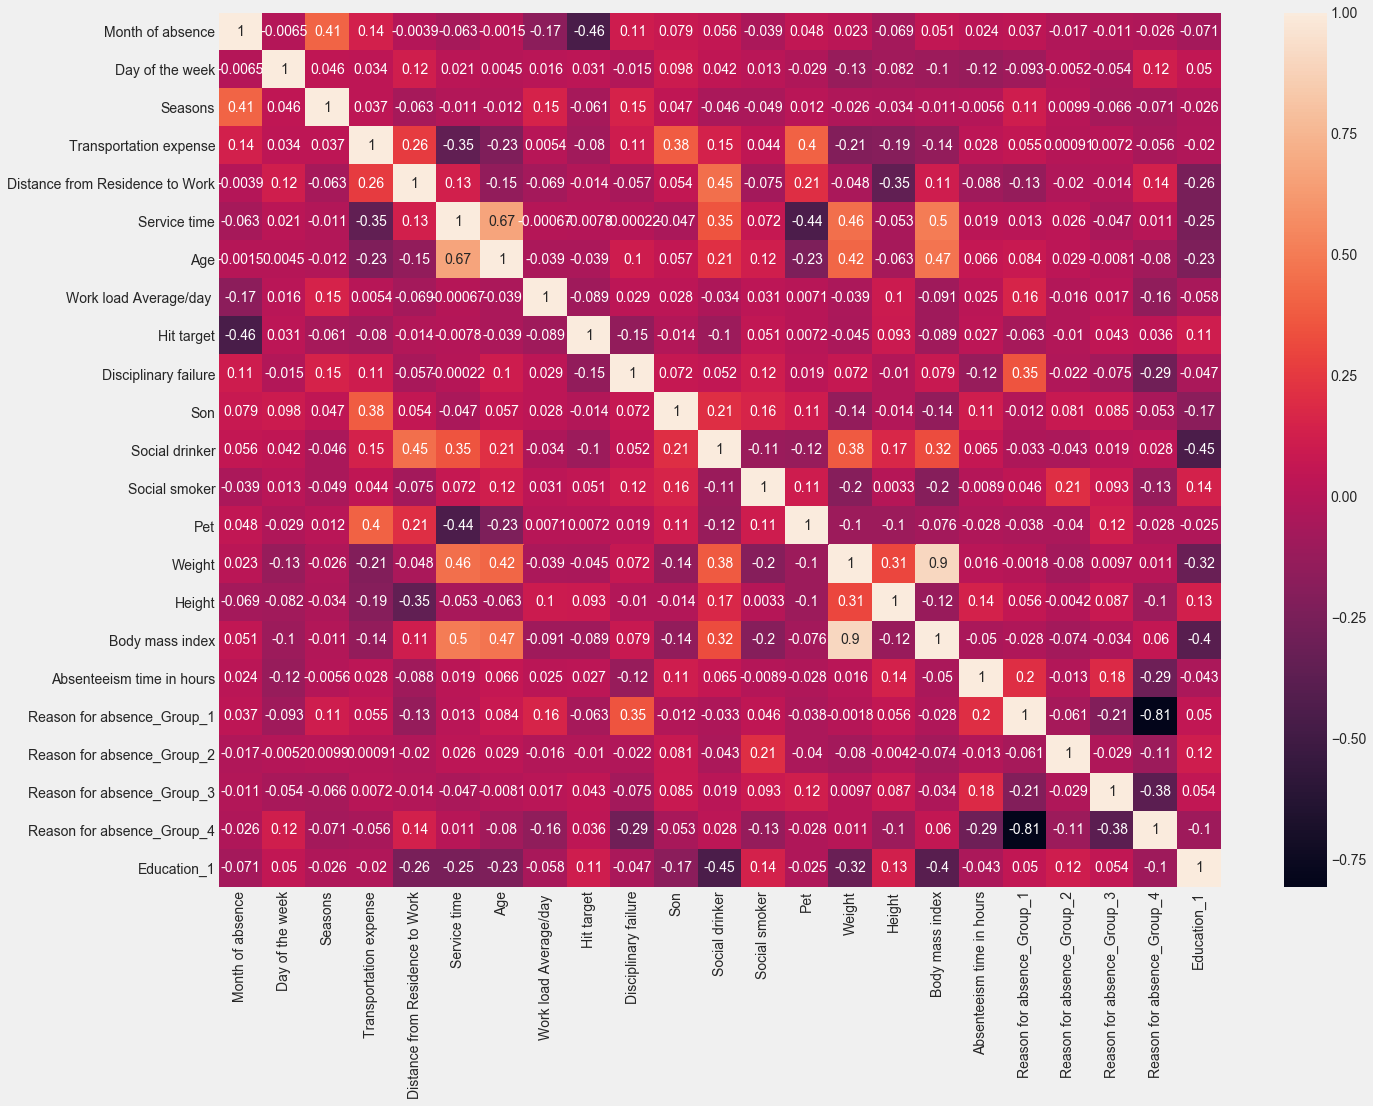

In [150]:
# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(data_2.corr(), annot=True)

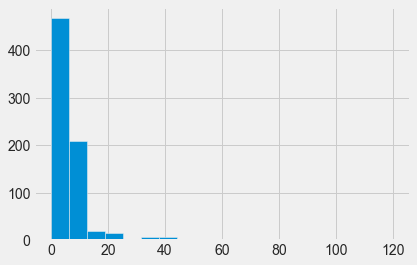

In [151]:
data_2['Absenteeism time in hours'].hist(bins=data_2['Absenteeism time in hours'].nunique())

In [152]:
X = data_2.drop('Absenteeism time in hours', axis=1)
y = np.where(data_2["Absenteeism time in hours"] > data_2["Absenteeism time in hours"].median(), 1, 0)

print(X.shape)
print(y.shape)

(740, 22)
(740,)


In [153]:
y.sum() / y.shape[0]

0.4581081081081081

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

model = LogisticRegression(solver="liblinear")

x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=20)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def accuracy_report(y_test, y_test_pred, sample="Test"):
    print(f"{sample} data:\n Accuracy Score {accuracy_score(y_test, y_test_pred)}")
    print(f"Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")


In [156]:
accuracy_report(y_train, y_train_pred, "Train")

Train data:
 Accuracy Score 0.7618243243243243
Confusion Matrix :
[[241  70]
 [ 71 210]]


In [157]:
accuracy_report(y_test, y_test_pred, "Test")

Test data:
 Accuracy Score 0.777027027027027
Confusion Matrix :
[[71 19]
 [14 44]]


In [158]:
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.84,0.70,0.78,0.77,0.78
recall,0.79,0.76,0.78,0.77,0.78
f1-score,0.81,0.73,0.78,0.77,0.78
support,90.00,58.00,0.78,148.00,148.00


In [159]:
scores = cross_val_score(model, X_std, y, cv=10)
scores.mean()

0.7216216216216217

In [160]:
model.intercept_

array([-0.22386101])

In [161]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
feature_name = X.columns
summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(model.coef_)
summary_table

,Features_name,Coefficients
0,Month of absence,0.28
1,Day of the week,-0.18
2,Seasons,-0.32
3,Transportation expense,0.57
4,Distance from Residence to Work,-0.07
5,Service time,-0.35
6,Age,0.02
7,Work load Average/day,0.05
8,Hit target,0.00
9,Disciplinary failure,-1.51


In [163]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table.sort_index(inplace=True)

In [164]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
summary_table.sort_values(by="Odds_ratio", ascending=False)

,Features_name,Coefficients,Odds_ratio
4,Transportation expense,0.57,1.77
15,Weight,0.49,1.64
11,Son,0.42,1.52
18,Reason for absence_Group_1,0.37,1.45
20,Reason for absence_Group_3,0.35,1.42
12,Social drinker,0.34,1.41
1,Month of absence,0.28,1.33
13,Social smoker,0.15,1.16
8,Work load Average/day,0.05,1.05
7,Age,0.02,1.02


In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"]}

random_forest_grid = GridSearchCV(rf_model, param_grid, scoring="accuracy", 
                                  n_jobs=-1, verbose=1, cv=3, iid=True)

random_forest_grid.fit(X_train, y_train)

y_train_pred = random_forest_grid.predict(X_train)
y_test_pred = random_forest_grid.predict(X_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   44.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [166]:
accuracy_report(y_test, y_test_pred)

Test data:
 Accuracy Score 0.7635135135135135
Confusion Matrix :
[[71 19]
 [16 42]]


In [167]:
accuracy_report(y_train, y_train_pred, "Train")

Train data:
 Accuracy Score 0.9662162162162162
Confusion Matrix :
[[300  11]
 [  9 272]]


In [168]:
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.82,0.69,0.76,0.75,0.77
recall,0.79,0.72,0.76,0.76,0.76
f1-score,0.80,0.71,0.76,0.75,0.76
support,90.00,58.00,0.76,148.00,148.00


In [169]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

gbm_model.fit(X_train, y_train)

y_train_pred = gbm_model.predict(X_train)
y_test_pred = gbm_model.predict(X_test)

In [170]:
accuracy_report(y_test, y_test_pred)

Test data:
 Accuracy Score 0.7432432432432432
Confusion Matrix :
[[70 20]
 [18 40]]


In [171]:
accuracy_report(y_train, y_train_pred, "Train")

Train data:
 Accuracy Score 0.8648648648648649
Confusion Matrix :
[[270  41]
 [ 39 242]]


In [172]:
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.80,0.67,0.74,0.73,0.74
recall,0.78,0.69,0.74,0.73,0.74
f1-score,0.79,0.68,0.74,0.73,0.74
support,90.00,58.00,0.74,148.00,148.00


In [173]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
                       'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
                       'booster' : booster, 'base_score' : base_score
                      }


xgb_model = xgb.XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=5, n_iter=50, scoring = 'accuracy',n_jobs =-1, iid=True,
                               verbose = 5, return_train_score = True, random_state=42)


xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   42.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   iid=True, n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 0.99],
                                        'booster':

In [174]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                         colsample_bynode=1, colsample_bytree=1, gamma=0,
                         learning_rate=0.1, max_delta_step=0, max_depth=2,
                         min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                         nthread=None, objective='binary:logistic', random_state=0,
                         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                         silent=None, subsample=1, verbosity=1)

In [176]:
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [177]:
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

In [178]:
accuracy_report(y_test, y_test_pred)

Test data:
 Accuracy Score 0.7837837837837838
Confusion Matrix :
[[71 19]
 [13 45]]


In [179]:
accuracy_report(y_train, y_train_pred, "Train")

Train data:
 Accuracy Score 0.8040540540540541
Confusion Matrix :
[[250  61]
 [ 55 226]]


In [180]:
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.85,0.70,0.78,0.77,0.79
recall,0.79,0.78,0.78,0.78,0.78
f1-score,0.82,0.74,0.78,0.78,0.79
support,90.00,58.00,0.78,148.00,148.00


In [181]:
# Let's save model
import pickle

with open('model', 'wb') as file:
    pickle.dump(xgb_best, file)